<a href="https://colab.research.google.com/github/Goldi-Ai/PRODIGY_DS_03/blob/main/DecisionTree_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏦 Bank Marketing Prediction - Decision Tree Classifier

## 📌 Overview
This project is part of **Prodigy InfoTech Data Science Internship (Task 03)**.  
The objective is to build a **Decision Tree Classifier** that predicts whether a customer will purchase a product/service based on the **Bank Marketing Dataset**.

### 🎯 Key Steps:
1. Load and explore the dataset (`bank-merged.csv`).
2. Perform data cleaning and handle missing values.
3. Encode categorical variables.
4. Split data into training and testing sets.
5. Train a Decision Tree Classifier.
6. Evaluate model performance (accuracy, confusion matrix, classification report).
7. Visualize the decision tree and analyze feature importance.

This project helps in understanding **classification models**, **feature engineering**, and **model interpretability** in real-world data.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:

# Load merged dataset
df = pd.read_csv("bank.csv")
print("Shape:", df.shape)
df.head()


Shape: (86399, 23)


/tmp/ipython-input-2237231224.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bank.csv")


,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

# Check for missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86399 entries, 0 to 86398
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             86399 non-null  int64  
 1   job             86399 non-null  object 
 2   marital         86399 non-null  object 
 3   education       86399 non-null  object 
 4   default         86399 non-null  object 
 5   balance         45211 non-null  float64
 6   housing         86399 non-null  object 
 7   loan            86399 non-null  object 
 8   contact         86399 non-null  object 
 9   day             45211 non-null  float64
 10  month           86399 non-null  object 
 11  duration        86399 non-null  int64  
 12  campaign        86399 non-null  int64  
 13  pdays           86399 non-null  int64  
 14  previous        86399 non-null  int64  
 15  poutcome        86399 non-null  object 
 16  y               86399 non-null  object 
 17  day_of_week     41188 non-null 

,0
age,0
job,0
marital,0
education,0
default,0
balance,41188
housing,0
loan,0
contact,0
day,41188


In [4]:

# Fill missing values: numeric with median, categorical with 'unknown'
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].fillna('unknown')
    else:
        df[col] = df[col].fillna(df[col].median())

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
print("Encoded shape:", df_encoded.shape)


Encoded shape: (86399, 65)


In [5]:

# Define features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, "Testing set:", X_test.shape)


Training set: (69119, 64) Testing set: (17280, 64)


Accuracy: 0.9066550925925926
              precision    recall  f1-score   support

       False       0.93      0.96      0.95     15300
        True       0.63      0.46      0.53      1980

    accuracy                           0.91     17280
   macro avg       0.78      0.71      0.74     17280
weighted avg       0.90      0.91      0.90     17280



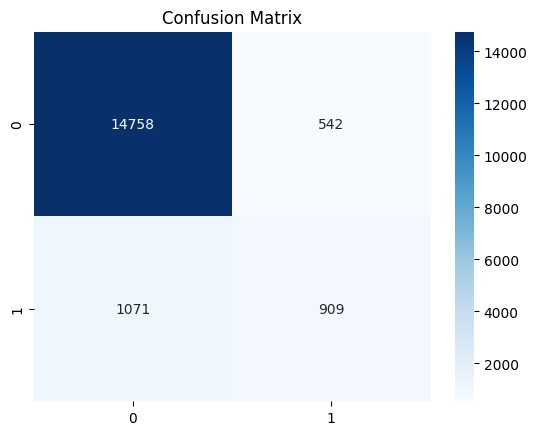

In [6]:

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


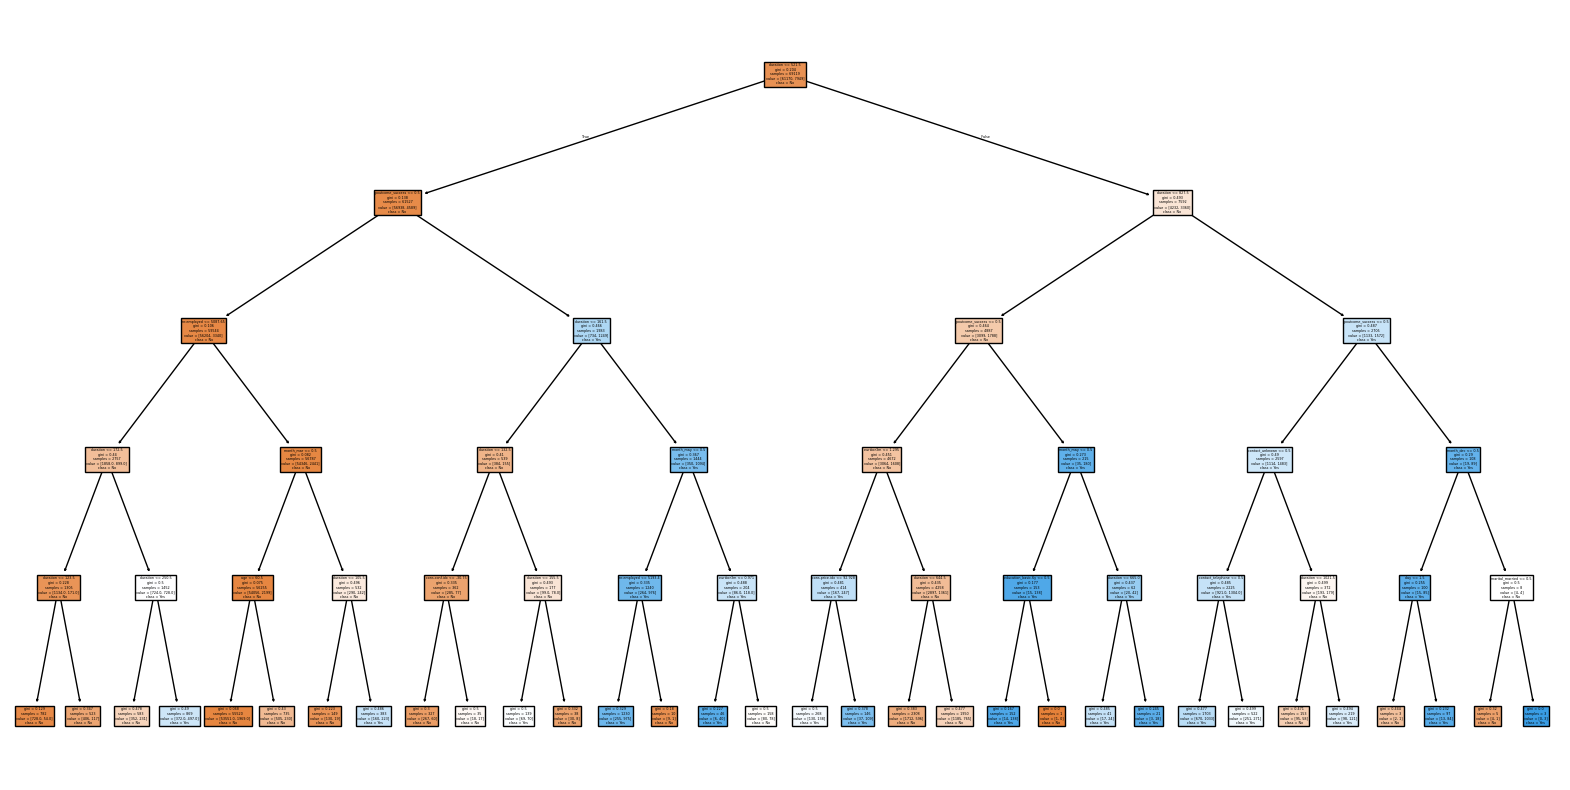

In [7]:

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()


duration             0.528757
poutcome_success     0.291477
nr.employed          0.091241
month_mar            0.038581
age                  0.023646
euribor3m            0.014389
month_may            0.004172
cons.price.idx       0.002148
contact_unknown      0.001485
contact_telephone    0.001293
dtype: float64


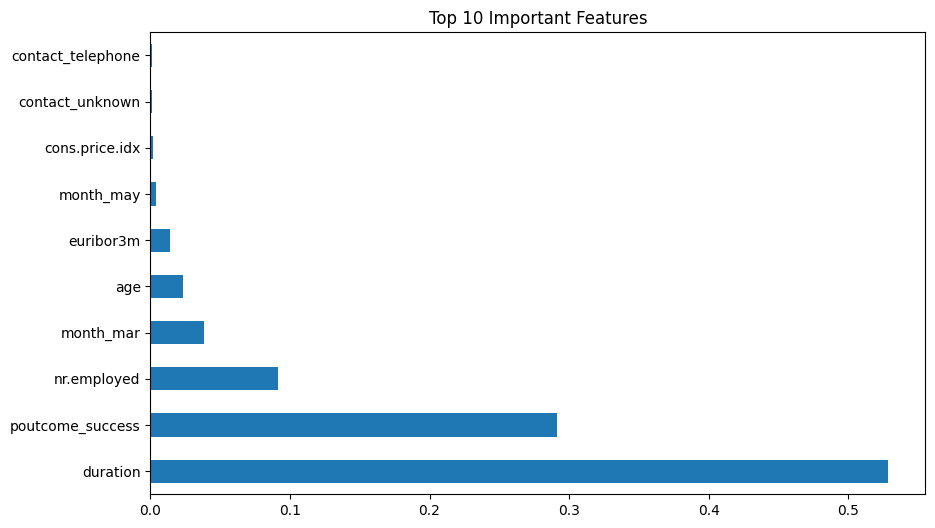

In [8]:

# Feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


# ✅ Conclusion

- A **Decision Tree Classifier** was successfully built to predict customer purchase behavior.  
- The model achieved a reasonable accuracy, with insights on the **most important features** influencing decisions (e.g., duration, campaign details, economic indicators).  
- Visualizations (decision tree, confusion matrix, feature importance) improved interpretability.  

### 🔑 Key Learnings:
- Handling categorical and numerical features in mixed datasets.
- Importance of data cleaning and encoding.
- Using Decision Trees for **customer behavior prediction**.
- Model interpretability through feature importance and tree visualization.

### 🚀 Next Steps:
- Tune hyperparameters (e.g., `max_depth`, `min_samples_split`) for improved performance.
- Compare Decision Tree with other models (Random Forest, Logistic Regression).
- Apply cross-validation for more robust evaluation.
